In [1]:
import pandas as pd
import numpy as np
import seaborn as sna
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_val_score, StratifiedKFold,GridSearchCV
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix, roc_auc_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# userId = Unique number given to each user.
# tier = Tier of the city in which the user is residing.
# gender = Categorical feature representing the gender of the user. 1 represents male and 2 represents female.
# following_rate =	Number of accounts followed by the user(feature is normalized)
# followers_avg_age = Average of age groups of all the followers of the user.
# following_avg_age=	Average of age groups of all the accounts followed by the user.
# max_repetitive_punc=	Maximum repititive punctuations found in the bio and comments of the user.
# num_of_hashtags_per_action	=Average nubmer of hashtags used by the user per comment.
# emoji_count_per_action	=Average number of emojis used by the user per comment.
# punctuations_per_action=	Average number of punctuations used by the user per comment.
# number_of_words_per_action	=Average number of words used by the user per comment.
# avgCompletion =Average watch time completion rate of the videos.
# avgTimeSpent=	Average time spent by the user on a video in seconds.
# avgDuration	=Average duration of the videos that the user has watched till date.
# avgComments	=Average number of comments per video watched.
# creations	Total number of videos uploaded by the user.
# content_views=	Total number of videos watched.
# num_of_comments=	Total number of comments made by the user (normalized)
# weekends_trails_watched_per_day=	Number of videos watched on weekends per day.
# weekdays_trails_watched_per_day	=Number of videos watched on weekdays per day.
# slot1_trails_watched_per_day	=The day is divided into 4 slots. This feature represents the average number of videos watched in this particular time slot.
# slot2_trails_watched_per_day=	The day is divided into 4 slots. This feature represents the average number of videos watched in this particular time slot.
# slot3_trails_watched_per_day=	The day is divided into 4 slots. This feature represents the average number of videos watched in this particular time slot.
# slot4_trails_watched_per_day=	data
# avgt2=	Average number of followers of all the accounts followed by the user.
# age_group=	This is a categorical feature denoting the age of the user. Age of users is divided into 4 groups,
# 1: <18y;
# 2: 18-24y;
# 3: 24-30y;
# 4: \>30y

In [3]:
df = pd.read_csv("C:/Users/Paras Gahlot/OneDrive/Desktop/Research paper/SocialMediaUsage.csv")


In [4]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488877 entries, 0 to 488876
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       488877 non-null  int64  
 1   userId                           488877 non-null  int64  
 2   tier                             488877 non-null  int64  
 3   gender                           488877 non-null  int64  
 4   following_rate                   488877 non-null  float64
 5   followers_avg_age                488877 non-null  float64
 6   following_avg_age                488877 non-null  float64
 7   max_repetitive_punc              488877 non-null  int64  
 8   num_of_hashtags_per_action       488877 non-null  float64
 9   emoji_count_per_action           488877 non-null  float64
 10  punctuations_per_action          488877 non-null  float64
 11  number_of_words_per_action       488877 non-null  float64
 12  av

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [5]:
df.drop(columns="Unnamed: 0",inplace=True)

In [6]:
df.head()

,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,0.076923,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,0.000000,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [7]:
df.isnull().sum()

userId                             0
tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
age_group                          0
dtype: int64

In [8]:
# X = df.drop('avgCompletion',axis=1)
# y = df['avgCompletion']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
# print(X_train.shape, X_test.shape)
# print(y_train.shape, y_test.shape)
# X_train.head()

In [10]:
print(df.describe())


             userId           tier         gender  following_rate  \
count  4.888770e+05  488877.000000  488877.000000   488877.000000   
mean   4.236096e+07       1.975382       1.213037        0.082233   
std    1.821664e+07       0.430707       0.409454        2.467781   
min    2.700000e+01       1.000000       1.000000        0.000000   
25%    3.537599e+07       2.000000       1.000000        0.000000   
50%    4.336270e+07       2.000000       1.000000        0.000000   
75%    5.370523e+07       2.000000       1.000000        0.008621   
max    7.904203e+07       3.000000       2.000000      895.304000   

       followers_avg_age  following_avg_age  max_repetitive_punc  \
count      488877.000000      488877.000000        488877.000000   
mean            0.347520           0.403049             0.739748   
std             0.816334           0.925291             3.075954   
min             0.000000           0.000000             0.000000   
25%             0.000000           0.0

In [11]:
print(df['tier'].value_counts())
print(df['gender'].value_counts())

tier
2    397890
1     51511
3     39476
Name: count, dtype: int64
gender
1    384728
2    104149
Name: count, dtype: int64


<Axes: >

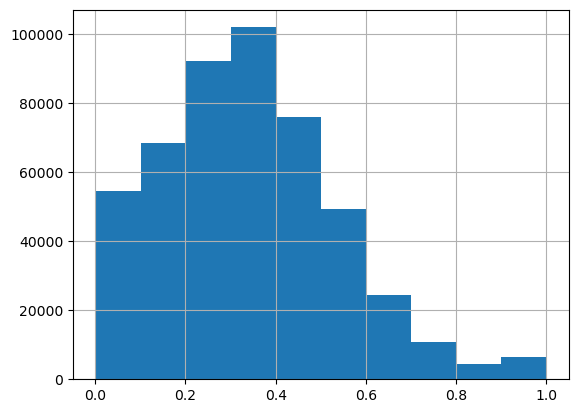

In [12]:
df['avgCompletion'].hist()

<Axes: >

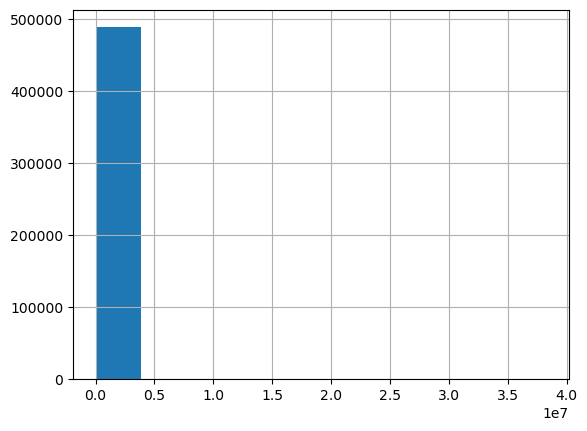

In [13]:
df['avgTimeSpent'].hist()

<Axes: >

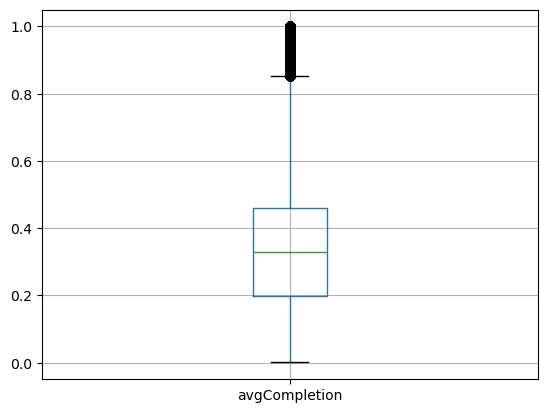

In [14]:
df.boxplot(column='avgCompletion')


<Axes: >

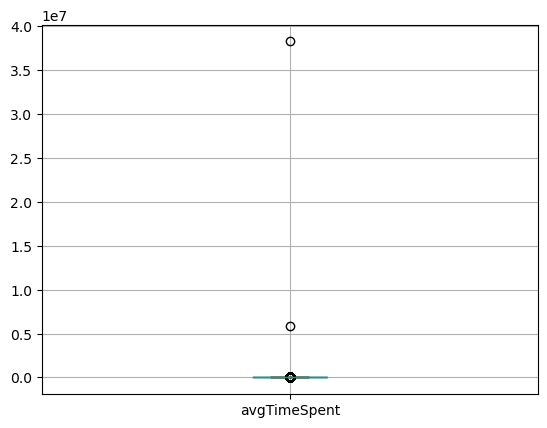

In [15]:
df.boxplot(column='avgTimeSpent')

In [16]:
df.head()

,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,0.076923,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,0.000000,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


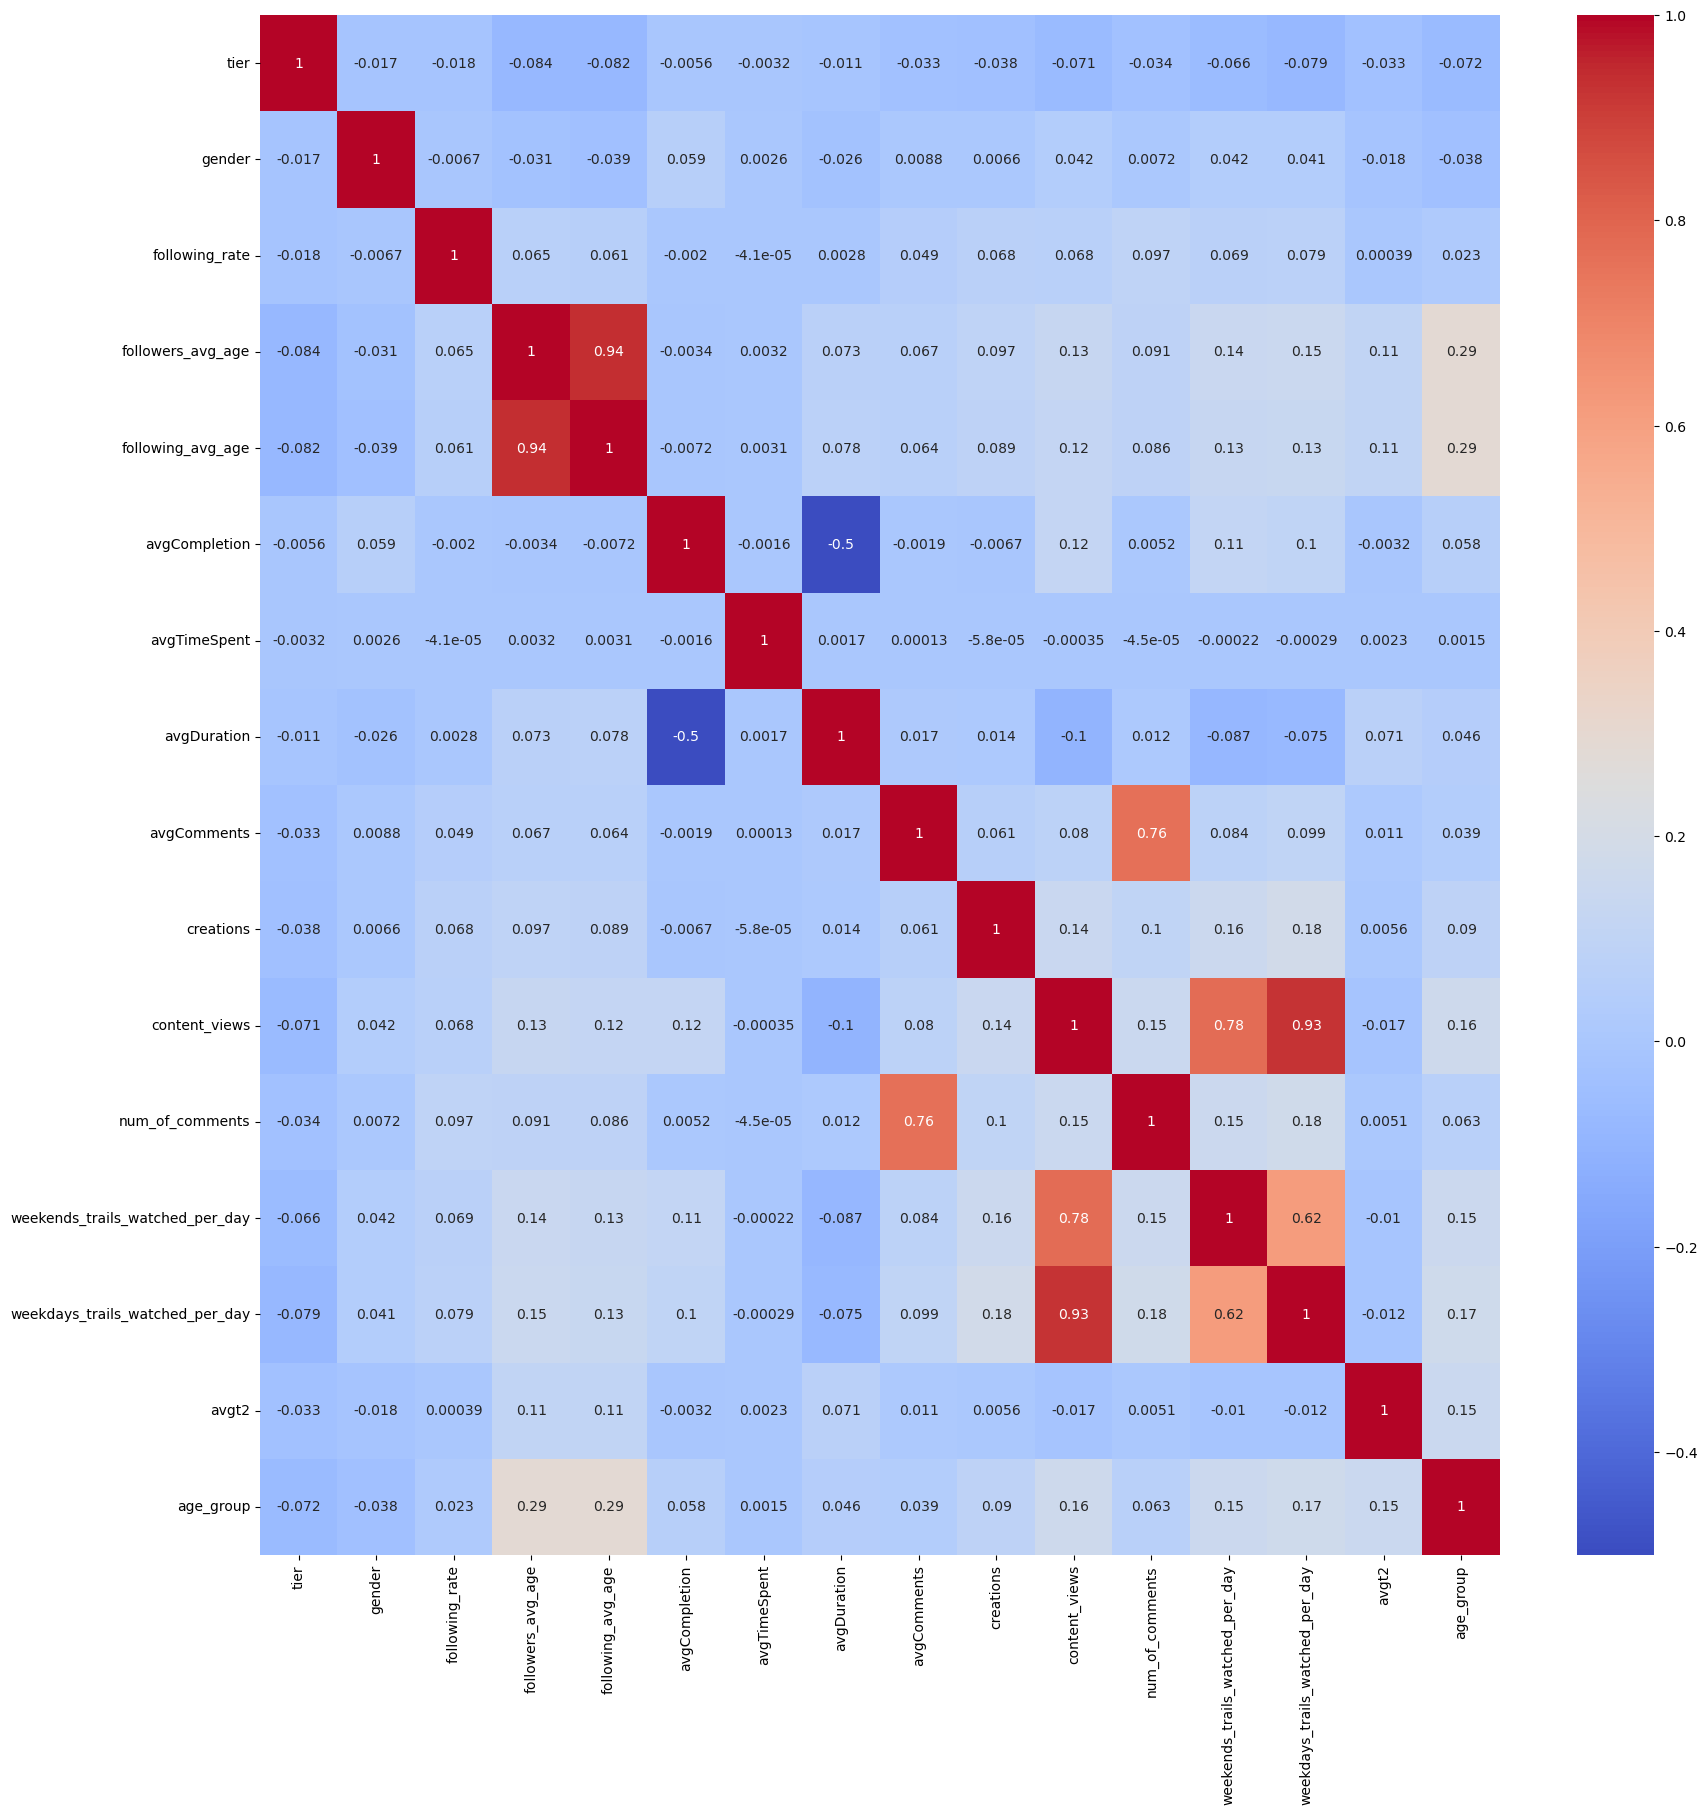

In [17]:

df_for_corr = df.drop(columns=["userId","max_repetitive_punc", "num_of_hashtags_per_action", "emoji_count_per_action", "punctuations_per_action", "number_of_words_per_action","slot1_trails_watched_per_day","slot2_trails_watched_per_day","slot3_trails_watched_per_day","slot4_trails_watched_per_day"])
plt.figure(figsize=(20,20))
corr_matrix = df_for_corr.corr()
sna.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

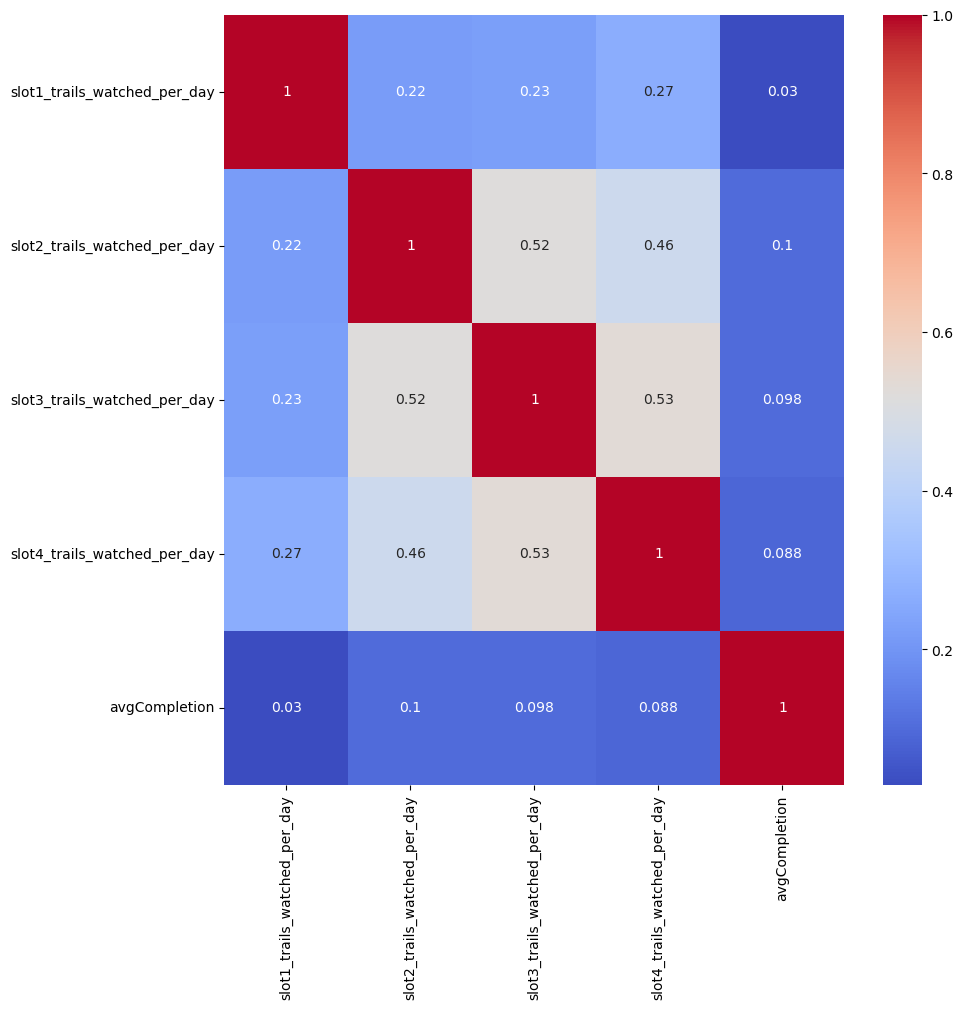

In [18]:

features =["slot1_trails_watched_per_day","slot2_trails_watched_per_day","slot3_trails_watched_per_day","slot4_trails_watched_per_day","avgCompletion"]

plt.figure(figsize=(10,10))
corr_matrix = df[features].corr()
sna.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='gender', ylabel='avgCompletion'>

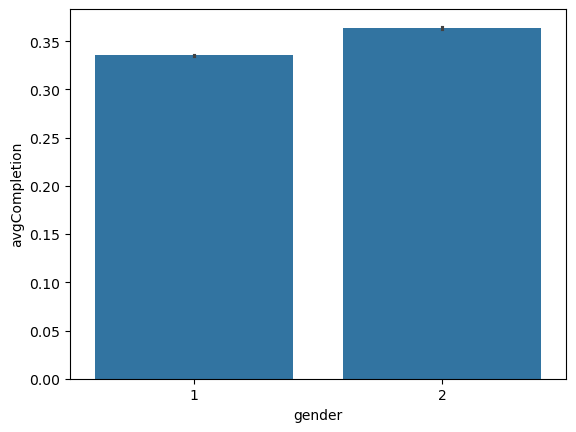

In [19]:
sna.barplot(x='gender', y='avgCompletion', data=df)


<Axes: xlabel='tier', ylabel='avgCompletion'>

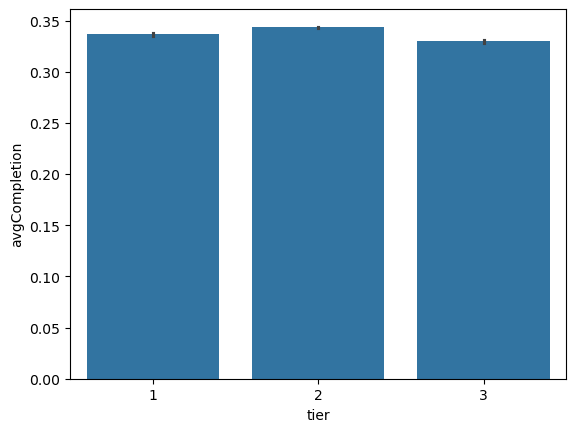

In [20]:
sna.barplot(x='tier', y='avgCompletion', data=df)

In [21]:
print(df.groupby('age_group')['avgCompletion'].mean())

age_group
1    0.334491
2    0.339283
3    0.354017
4    0.367427
Name: avgCompletion, dtype: float64


In [22]:
print(df.groupby('tier')['avgCompletion'].mean())

tier
1    0.336847
2    0.343384
3    0.329600
Name: avgCompletion, dtype: float64


In [23]:
print(df.groupby('gender')['avgCompletion'].mean())

gender
1    0.335551
2    0.363861
Name: avgCompletion, dtype: float64


In [24]:
from scipy import stats

z_scores = stats.zscore(df['avgCompletion'])
df['z_score'] = z_scores
df[df['z_score'].abs() > 3].head()  # Outliers beyond 3 standard deviations


,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,...,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group,z_score
22,47299417,2,1,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.004132,0.000000,0.0,0.000000,0.0,0.008264,0.0,1,3.222264
280,56820770,2,1,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.000000,0.001887,0.0,0.009434,0.0,0.000000,0.0,1,3.368879
314,62348370,2,1,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.006494,0.000000,0.0,0.012987,0.0,0.000000,0.0,1,3.224240
326,44514887,2,1,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.000000,0.003279,0.0,0.016393,0.0,0.000000,0.0,1,3.368879
343,2292117,2,1,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.000000,0.000771,0.0,0.000000,0.0,0.003854,0.0,2,3.361216


In [25]:
df = df.drop(columns=["userId", "max_repetitive_punc", "emoji_count_per_action", "punctuations_per_action", "number_of_words_per_action", "avgt2", "avgComments", "creations"])


In [26]:
df.drop(columns=["z_score"],inplace=True)

In [27]:
df.drop(columns=["num_of_hashtags_per_action"],inplace=True)

In [28]:
df.head()

,tier,gender,following_rate,followers_avg_age,following_avg_age,avgCompletion,avgTimeSpent,avgDuration,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,age_group
0,2,1,0.0,0.0,0.0,0.463330,34.160000,53.996091,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,1
1,2,2,0.0,0.0,0.0,0.429468,15.285714,96.231625,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,2
2,2,1,0.0,0.0,0.0,0.341657,22.000000,83.051415,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,1
3,2,1,0.0,0.0,0.0,0.005735,3.000000,523.080000,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,1
4,2,2,0.0,0.0,0.0,0.456549,12.333333,53.766640,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,1


In [29]:
X = df.drop(columns=['avgCompletion'])  # Features
y = df['avgCompletion']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [30]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred_linear = linear_model.predict(X_test)
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_linear))
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("R²:", r2_score(y_test, y_pred_linear))

Linear Regression:
MAE: 0.12864626980161167
MSE: 0.028597633285064754
R²: 0.2504774404814962


In [ ]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)

In [ ]:
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))
